# Project 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed

In [2]:
from RegressionModel import RegressionModel, ModelResults, ModelType
from SamplingData import SamplingData
from helper_func import *
from BootstrapSampling import BootstrapSampling
from CrossValidationKFold import CrossValidationKFold

In [3]:
seed = 3155
np.random.seed(seed)
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
#plot_3d_franke(x, y, z)

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Fix your x and y values, they should span the whole room. Using linspace and mesh
- [ ] Add confidence intervals for beta by computing variance for each beta

### a) OLS on the Franke function
Show confidence_interval

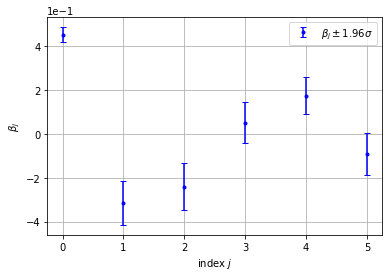

In [4]:
def confidence_interval(X, z, beta):
    cov = np.var(z)*np.linalg.pinv(X.T.dot(X))
    std_beta = np.sqrt(np.diag(cov))
    CI = 1.96*std_beta

    #plot results
    plt.errorbar(range(len(beta)), beta, CI, fmt="b.", capsize=3, label=r'$\beta_j \pm 1.96 \sigma$')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend()
    plt.xlabel(r'index $j$')
    plt.ylabel(r'$\beta_j$')
    plt.grid()
    plt.show()

x, y, z = create_frankie_data(seed, N = 100, noise_strength=0.1)
X = create_X(x, y, n = 2)
model = RegressionModel()
sampling = SamplingData(X, z, model)
sampling.fit()
confidence_interval(X, z, sampling.model.beta)

### Part b): Bias-variance trade-off and resamplng techniques

- [ ] Implement bootstraping, it should get data several times for each polynomial. Just to have a better estimate of errors and such. Not to to train better

In [4]:
trials = 2
sample_count = 100
p = 8
N = 100
polydegree = np.zeros(p)

train_results = ModelResults(p)
test_results = ModelResults(p)
x, y, z = create_frankie_data(seed, N)
for degree in range(p):
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(X, z, RegressionModel(), trials, sample_count)
    train_deg_result, test_deg_result = boot.fit()
    train_results.set_results(train_deg_result, degree)
    test_results.set_results(test_deg_result, degree)

Beta:  [0.46589614]
Beta:  [0.44194491]
Beta:  [ 0.48361614 -0.14293798 -0.20815118]
Beta:  [ 0.485256   -0.1357624  -0.23572842]
Beta:  [ 0.46978219 -0.39204359 -0.33308722  0.10318807  0.20615027 -0.06119562]
Beta:  [ 0.43578037 -0.22129696 -0.14423909 -0.04191228  0.17034228 -0.18539083]
Beta:  [ 0.4480713  -0.07387741  0.44836802 -0.65446478  0.38085799 -1.98203196
  0.42310233  0.07854507 -0.2403196   1.2512015 ]
Beta:  [ 0.44297194  0.01540507  0.78416299 -1.21923949  0.49430566 -2.92662361
  0.96433424 -0.14170064 -0.17130774  1.85890719]
Beta:  [ 0.42708434  1.32154019  1.00164069 -7.76804622  1.44933939 -5.05182039
 10.09882173  0.42804222 -1.64415392  5.71198634 -4.11555072 -0.75046722
  0.48647656  0.33904959 -1.95026999]
Beta:  [ 0.4263664   1.92649897  0.44172562 -8.54394164 -0.20240929 -2.08123489
 10.75048754  1.56894345 -0.55950691  2.07603681 -4.44650957 -0.85079296
 -0.10053617  0.29311662 -0.65117448]
Beta:  [  0.46515117   4.63788676   2.36934877 -17.41871899 -10.65

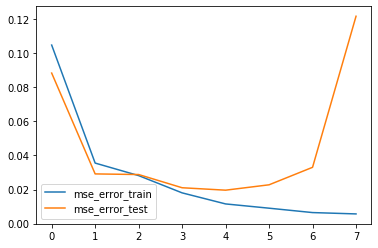

In [6]:
values_to_plot = {
    #"variance_beta_train": train_results.variance_beta_avg,
    #"variance_beta_test": test_results.variance_beta_avg,
    "mse_error_train": train_results.mse_avg,
    "mse_error_test": test_results.mse_avg,
    #"bias_train": train_results.bias_avg,
    #"bias_test": test_results.bias_avg,
}


plot_test_train(polydegree, values_to_plot)

### c): Cross-validation

In [8]:
k_folds = 5
p = 12
N = 100
polydegree = np.zeros(p)

train_results_cross_valid = ModelResults(p)
test_results_cross_valid = ModelResults(p)
x, y, z = create_frankie_data(seed, N)
for degree in range(p):
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    cross_valid = CrossValidationKFold(X, z, RegressionModel(), k_folds)
    train_deg_result, test_deg_result = cross_valid.fit()
    train_results_cross_valid.set_results(train_deg_result, degree)
    test_results_cross_valid.set_results(test_deg_result, degree)

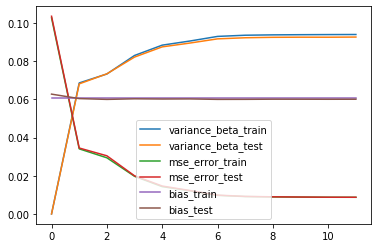

In [10]:
values_to_plot = {
    "variance_beta_train": train_results_cross_valid.variance_beta_avg,
    "variance_beta_test": test_results_cross_valid.variance_beta_avg,
    "mse_error_train": train_results_cross_valid.mse_avg,
    "mse_error_test": test_results_cross_valid.mse_avg,
    "bias_train": train_results_cross_valid.bias_avg,
    "bias_test": test_results_cross_valid.bias_avg,
}


plot_test_train(polydegree, values_to_plot)

### Part d): Ridge Regression on the Franke function  with resampling

1. Implement Ridge Regression
2. Preform bootstrap analysis as in b)
3. Preform cross-validation as in c) but now on dependence on $\lambda$
4. Comment on the differences

- [ ] Compute beta using s v d
- [ ] Implement your own svd ?

In [32]:
trials = 5
sample_count = 1000
p = 4
N = 1000
polydegree = np.zeros(p)

train_results = ModelResults(p)
test_results = ModelResults(p)
x, y, z = create_frankie_data(seed, N)
for degree in range(p):
    print("Bootstrap: ", degree + 1)
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(X, z, RegressionModel(ModelType.Ridge), trials, sample_count)
    train_deg_result, test_deg_result = boot.fit()
    train_results.set_results(train_deg_result, degree)
    test_results.set_results(test_deg_result, degree)

Bootstrap:  1
Bootstrap:  2
Bootstrap:  3
Bootstrap:  4


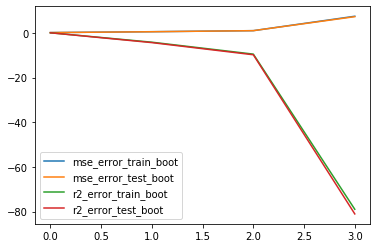

In [34]:
values_to_plot = {
    "mse_error_train_boot": train_results.mse_avg,
    "mse_error_test_boot": test_results.mse_avg,
    "r2_error_train_boot": train_results.r2_avg,
    "r2_error_test_boot": test_results.r2_avg,
}

plot_test_train(polydegree, values_to_plot)

0  lambda:  0.0
1  lambda:  0.1
2  lambda:  1.0
3  lambda:  100.0
4  lambda:  1000.0
5  lambda:  1000000.0


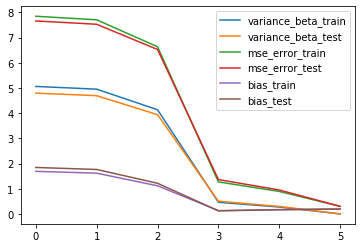

In [21]:
k_folds = 5
p = 3
N = 100
lambda_values = np.array([0.0, 0.1, 1.0, 100.0, 1000.0, 1000000.0])
train_results_cross_valid = ModelResults(len(lambda_values))
test_results_cross_valid = ModelResults(len(lambda_values))
x, y, z = create_frankie_data(seed, N)
X = create_X(x, y, p, debug = False)

for i in range(len(lambda_values)):
    print(i, " lambda: ", lambda_values[i])
    cross_valid = CrossValidationKFold(X, z, RegressionModel(ModelType.Ridge, alpha = lambda_values[i]), k_folds)
    train_deg_result, test_deg_result = cross_valid.fit()
    train_results_cross_valid.set_results(train_deg_result, i)
    test_results_cross_valid.set_results(test_deg_result, i)

values_to_plot = {
    "variance_beta_train": train_results_cross_valid.variance_beta_avg,
    "variance_beta_test": test_results_cross_valid.variance_beta_avg,
    "mse_error_train": train_results_cross_valid.mse_avg,
    "mse_error_test": test_results_cross_valid.mse_avg,
    "bias_train": train_results_cross_valid.bias_avg,
    "bias_test": test_results_cross_valid.bias_avg,
}

plot_test_train([x for x in range(len(lambda_values))], values_to_plot)

### Terrain Data

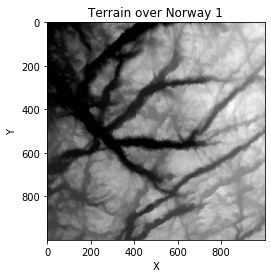

In [3]:
x_mesh, y_mesh, z = create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif')
p = 2
X = create_X(x_mesh, y_mesh, p)

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

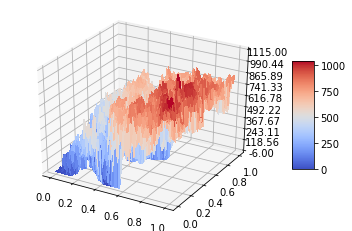

In [11]:
plot_3d_franke(x_mesh, y_mesh, z, set_limit = False)